# Escala de Grises

En este libro configuraré las clases <tt>Class</tt> para filtrar la incidencia delictiva. Venga!

In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
# Acepta el archivo de origen del Secretariado que está en la página
path_id = "/Users/roas/Projects_Git/TP1/Resources/IDM_NM_may19.csv"
ide_df = pd.read_csv(path_id, encoding='latin-1')

El código maneja los siguientes nombres de columnas para los datos descargados de la página del Secretariado Ejecutivo:
- Año -> Year
- Clave Entidad -> Clave_Ent 
- Entidad -> Entidad
- Clave Municipio -> Clave_mun
- Municipio -> Municipio
- Bien juridico afectado -> Bien_juridico
- Subtipo delito -> Subtipo_delito
- Modalidad -> Modalidad

In [11]:
# Revisión en el cambio de nombre
ide_df = ide_df.rename(columns={"Bien_juridico afectado":'Bien_juridico'})

# Filtros al DataFrame
Estas funcciones se aplican a la lista en formato meses en columnas del Data Frame= ide_df
- La siguiente función valida una lista, si la lista está vacia regresa todos los elementos,
- Si algunos elementos son validos, solo regresa los elementos validos o 
- Si todos los elementos no corresponden a la lista, regresa todos los elementos.

La clase recibe un DataFrame, con las columnas <tt>'Year', 'Entidad', 'Bien_juridico', 'Modalidad', 'Tipo_delito', 'Subtipo_delito'</tt>, además de una lista con las opciones que estén en los campos que se quieren filtrar. 

Finalmente regresa con la operación .filtrado(), el DataFrame filtrado. 

In [7]:
class FiltroEG():
    
   #Declaro el listado de todas las posibles variables que habrá que filtrar
#     years_ide = ide_df['Year'].unique()
#     entidad_ide = ide_df['Entidad'].unique() 
#     bienjuridico_ide = ide_df['Bien_juridico'].unique() 
#     modalidad_ide = ide_df['Modalidad'].unique() 
#     tipo_ide = ide_df['Tipo_delito'].unique() #Esta es una variable general
#     subtipo_ide = ide_df['Subtipo_delito'].unique()   
   
    #En mis peticiones de entrada están las varaibles seleccionadas por el usuario como filtro
    def __init__(self,ide_df,year,entidad,bienjuridico,tipo,subtipo,modalidad):
        self.ide_df = ide_df
        self.year = year
        self.entidad = entidad
        self.bienjuridico = bienjuridico
        self.modalidad = modalidad
        self.tipo = tipo
        self.subtipo = subtipo
        
    def year_select(self):
        years_ide = self.ide_df['Year'].unique()
        valid = []
        if not self.year: return years_ide
        else:
            for y in self.year:
                if y in years_ide:
                    valid.append(y)
        if not valid: return years_ide
        return valid

    def entidad_select(self):
        entidad_ide = self.ide_df['Entidad'].unique() 
        valid = []
        if not self.entidad: return entidad_ide
        else:
            for y in self.entidad:
                if y in entidad_ide:
                    valid.append(y)
        if not valid: return entidad_ide
        return valid
    
    def bienjuridico_select(self): 
        valid = []
        bienjuridico_ide = self.ide_df['Bien_juridico'].unique()
        if not self.bienjuridico: return bienjuridico_ide
        else:
            for y in self.bienjuridico:
                if y in bienjuridico_ide:
                    valid.append(y)
        if not valid: return bienjuridico_ide
        return valid

    def modalidad_select(self):
        valid = []
        modalidad_ide = self.ide_df['Modalidad'].unique() 
        if not self.modalidad: return modalidad_ide
        else:
            for y in self.modalidad:
                if y in modalidad_ide:
                    valid.append(y)
        if not valid: return modalidad_ide
        return valid

    def subtipodelito_select(self):    
        valid = []
        subtipo_ide = self.ide_df['Subtipo_delito'].unique()  
        if not self.subtipo: return subtipo_ide
        else:
            for y in self.subtipo:
                if y in subtipo_ide:
                    valid.append(y)
        if not valid: return subtipo_ide
        return valid

    def tipodelito_select(self):
        tipo_ide = self.ide_df['Tipo_delito'].unique()
        valid = []
        if not self.tipo: return tipo_ide
        else:
            for y in self.tipo:
                if y in tipo_ide:
                    valid.append(y)
        if not valid: return tipo_ide
        return valid
        
    ### Función para el filtrado de información para la base ide_df
    # def filtrado(self.year_select(), self.entidad_select(), self.bienjuridico_select(), self.tipodelito_select(), self.subtipodelito_select(), self.modalidad_select()):
    def filtrado(self):
        return self.ide_df[self.ide_df['Year'].isin(self.year_select()) & self.ide_df['Entidad'].isin(self.entidad_select()) & self.ide_df['Bien_juridico'].isin(self.bienjuridico_select()) 
                      & self.ide_df['Tipo_delito'].isin(self.tipodelito_select()) &  self.ide_df['Subtipo_delito'].isin(self.subtipodelito_select())
                     & self.ide_df['Modalidad'].isin(self.modalidad_select())&self.ide_df['Municipio']&self.ide_df['Clave_mun']]

    


## Datos a través de registros
La información que se presenta en la base de Incidencia Delictiva Estatal, se encuentra listada con las columnas de meses como campos y no como registros, lo que dificulta operaciones de gráficas y mediciones a través del tiempo. 
Las siguientes funciones, crean una nueva tabla con la información en registros, además de agregar las columnas de 'Fecha' y 'Data', para describir toda la información.
Consideraciones:
- Al campo del dato de fecha se le asignó el último día del mes.
- Utiliza el DF con los siguientes campos <tt>'Year', 'Entidad', 'Bien_juridico', 'Modalidad', 'Tipo_delito', 'Subtipo_delito'</tt>

In [8]:
class RegistrosEG():
    #Variables que operan en la función
    mes = ['Enero','Febrero','Marzo', 'Abril', 'Mayo', 'Junio', 
           'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']
    years_ide = ide_df['Year'].unique()
    
### Funición para tomar los campos de meses y hacer registros.
    def __inti__(self):
        pass
    
    
    def ide_registros(self):
    
        #Nuevo DataFrame que se llenará 
        ide_t = pd.DataFrame({'Year':[],'Entidad':[],'Bien_juridico':[],'Tipo_delito':[],
                              'Subtipo_delito':[],'Modalidad':[],'Fecha':[],'Fecha_pd':[],'Data':[],'Municipio':[],'Clave_mun':[]})

        # Se debe de tomar en consideración la actualización de periodos para próximos años'''
        # Genera un rango de un periodo de 60 meses que empieza en enero 2015 y concluye en diciembre 2019#
        idx = pd.date_range('31/01/2015', periods=12*len(RegistrosEG.years_ide), freq='M') 
        f=0

        #Recorrer el DataFrame de incidencia para acomodarlo en filas, con una columna que distinga las fechas
        for y in RegistrosEG.years_ide:
            #Filtrar el data frame por años
            dataframe = ide_df[ide_df['Year'].isin([y])]

            for m in RegistrosEG.mes:
                #Filtrar la columna del mes para cada DataFrame
                ide_m = dataframe[['Year', 'Entidad','Bien_juridico','Tipo_delito','Subtipo_delito','Modalidad','Municipio',m,"Clave_mun"]]
                ide_m['Fecha'] = m + ' '+ str(y) 
                ide_m['Fecha_pd'] = idx[f]
                ide_m = ide_m.rename(columns = {m : 'Data'})
                ide_t = pd.concat([ide_t,ide_m])
                f += 1
        
        return ide_t.dropna()

# Operaciones y gráficas

Separé las operaciones y realicé las gráficas en esta clase. Esta clase recibe un elemento DataFrame con registros por fecha.
- Los elementos de filtrados, se conjuntan en suma con todas las ocurrencias señaladas

In [12]:
# Se establece las clases para poder obtener los datos a través de registros con fecha!

registro = RegistrosEG()
ide_t = registro.ide_registros()

/Users/roas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/roas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/roas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence th

In [12]:
# Guarda el archivo en un excel filtrado!

ide_t.to_csv('ide_reng_mayo_19.csv',index=False)

In [13]:
# Aplica los filtos por subtipo de delito, 

df_filtrado = FiltroEG(ide_t,year=[],entidad=[],bienjuridico=[],modalidad=[],tipo=[],subtipo=['Homicidio doloso','Homicidio culposo',
                                                                                             ' Extorsión','Robo con violencia','Robo de vehículo',
                                                                                              'Robo a casa habitación','Robo a negocio','Robo a transeúnte en vía pública',
                                                                                              "Robo a transeúnte en espacio abierto al público"
                                                                                              'Feminicidio'
                                                                                             ]).filtrado()



In [16]:
df_filtrado.to_csv('ide_reng_filtrado_19',index=False)

In [39]:
# Estás son las librerías que se requieren para poder greaficar por fecha, por favor agregar!!!


from matplotlib import dates
from datetime import datetime
from scipy import stats

In [14]:
#Filtrar datos para gráfica, se toman los datos que se quieren filtrar y se realiza la operación con las clases 
# que se construyeron antes

# Se genera el DataFrame con los registros por fecha.
# ide_t = RegistrosEG().ide_registros() 

# Esta función genera un elemento de la clase FiltroEG y lo regresa con los datos filtrados
# Se seleccionan las opciones que se quieren filtrar
df_filtrado = FiltroEG(ide_t,year=[],entidad=[],bienjuridico=[],modalidad=[],tipo=[],subtipo=['Homicidio doloso','Homicidio culposo',
                                                                                             ' Extorsión','Robo con violencia','Robo de vehículo',
                                                                                              'Robo a casa habitación','Robo a negocio','Robo a transeúnte en vía pública',
                                                                                              "Robo a transeúnte en espacio abierto al público"
                                                                                              'Feminicidio'
                                                                                             ]).filtrado()


In [15]:
### Generé una nueva tabla con solo los elementos filtrados
###  Un nuevo índice por fechas para poder realizar operaciones por fechas
df_filtrado.set_index('Fecha_pd',inplace=True) #esta operación no se pueda asignar como DFrame

#Además se tiene que revisar como realizada o no, porque no se puede repetir ya que tiene los valores como índice
#no los puede volver a hacer indice

In [16]:
### Agrupación de datos por mes, sumando los datos
datos = df_filtrado.resample('m').sum()

In [27]:
### Regresión líneal

# Lo ideal es hacer otra función que pueda se llamada por la gráfica.
# En la siguiente línea se llama la función para filtrar el DataFrame
crime_rate = datos.iloc[:, 0]
periodo =np.arange(0,len(datos['Data']),1)
vc_slope, vc_int, vc_r, vc_p, vc_std_err = stats.linregress(periodo, crime_rate)
vc_fit = vc_slope * periodo + vc_int
stats_dataframe = pd.DataFrame({'VC_Slope':[vc_slope], 'VC_Int':[vc_int], 'VC_R':[vc_r],
                               'VC_P':[vc_p], 'VC_Std_err':[vc_std_err]})
# De la operación de regresión líneal tenemos los datos para gráficar la recta que se define por este método
vc_fit
stats_dataframe



,VC_Slope,VC_Int,VC_R,VC_P,VC_Std_err
0,739.13651,126840.997904,0.763964,2.842736e-11,87.418079


In [11]:
# Agregué a la nuestra Data Frame a gráficar los datos generados de la Regresión Líneal, para poder tener el mismo
# periodo 'Fecha_pd'
datos['VC_Fit'] = vc_fit

/Users/roas/anaconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


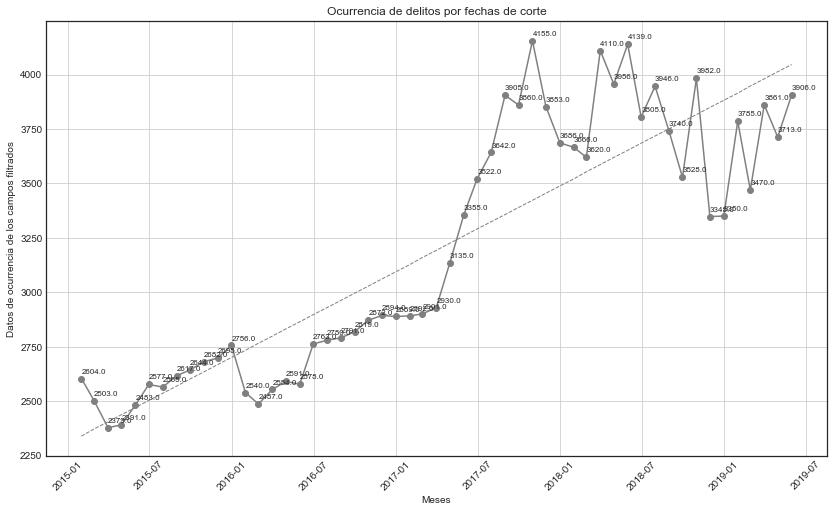

In [12]:
### Gráfica de Incidencia Delictiva, claro con los datos que se filtraron de los campos 

# Para los filtros de tiempo, es un buen tema, ambas [x, y] tienen que tener
# ser del mismo tamaño por lo que habrá de filtrar ambas.
# Seleccioné las variables de las fechas, como entrada.

f_inicial = '2015-01-01'
f_final   = '2019-12-31'


# Empecemos definiendo los parámetros generales de los marcos para la gráfica
plt.rcParams['figure.figsize'] = (14, 8) 
plt.style.use('seaborn-white')

### La siguiente gráfica es con Matplotlib, enfocada en objetos.
# Se inicializan dos objetos, la figura (frame general) y los ejes cuadro dentro de la figura
fig, ax1 = plt.subplots()

# Grafiqué los datos 'DataFrame.index.values' -> trae los valores del indice!

ax1.plot(datos.loc[f_inicial:f_final].index.values, datos.loc[f_inicial:f_final]['Data'], '-o', c='grey')
ax1.plot(datos.loc[f_inicial:f_final].index.values, datos.loc[f_inicial:f_final]['VC_Fit'], '--', c='grey', linewidth=1)

# Inclusión de etiquetas y título
ax1.set(xlabel="Meses",
ylabel="Datos de ocurrencia de los campos filtrados",
title="Ocurrencia de delitos por fechas de corte")
ax1.yaxis.grid(True)
ax1.xaxis.grid(True)

# Impresión de etiquetas de fecha con rotación
types = datos.loc[f_inicial:f_final]['Data']
x_coords = datos.loc[f_inicial:f_final].index.values
y_coords = datos.loc[f_inicial:f_final]['Data']

# Agregar a la gráfica las etiquetas de los valores

for i,type in enumerate(types):
    x = x_coords[i]
    y = y_coords[i]
    plt.text(x, y+24, str(type), fontsize=8)
#     plt#.text(x+3, y+2, str(x.strftime('%m/%Y')), fontsize=8)   #para agregar en las etiquetas las fechas
plt.setp(ax1.get_xticklabels(), rotation=45)
plt.show()



In [14]:
resumen = pd.DataFrame()
resumen['Total de Delitos'] = [df_filtrado['Data'].sum()]
resumen['Mayor # de ocurrencias de un delito en el periodo'] = df_filtrado['Data'].max()
resumen['Delito con mayor # de ocurrencias'] = (df_filtrado[df_filtrado['Data'] == df_filtrado['Data'].max()]
                                                ["Tipo_delito"].values + '; ' + 
                                                df_filtrado[df_filtrado['Data'] == df_filtrado['Data'].max()]
                                                ["Modalidad"].values + '; ' +
                                                df_filtrado[df_filtrado['Data'] == df_filtrado['Data'].max()]
                                                ["Subtipo_delito"].values 
                                               )
resumen['Mes con mayor # de delitos en el periodo'] = datos[datos['Data'] == datos['Data'].max()].index.values
resumen['Entidades seleccionadas'] = df_filtrado['Entidad'].unique()
resumen['Promedio'] = datos['Data'].mean()
resumen['Desviación estándar'] = datos['Data'].std()
resumen



,Total de Delitos,Mayor # de ocurrencias de un delito en el periodo,Delito con mayor # de ocurrencias,Mes con mayor # de delitos en el periodo,Entidades seleccionadas,Promedio,Desviación estándar
0,169218.0,448.0,Robo; Robo de coche de 4 ruedas Sin violencia;...,2017-10-31,Michoacán de Ocampo,3192.792453,576.685868
